# Gauss elimination

Solving
\begin{align}
2x_1+5x_2+3x_3=2 \\
3x_1+2x_2-3x_3=1\\
x_1+2x_2+x_3=7
\end{align}

## Strategy

We use row reduction to solve the linear system. It comprises two steps: **Forward Elimination** and **Backward Substitution**. **Forward Elimination** is to eliminate the lower triangular elements so that they become zeros. e.g., something like this

$Aug = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & b_1\\
0 & a_{22} & a_{23} & b_2\\
0 & 0 & a_{33} & b_3
\end{bmatrix}$

The detailed steps can be found in the following example.

## Forward elimination
1. write it as a matrix form $$\mathbf{Ax=b}$$
   where $\mathbf{A}= \begin{bmatrix}
   2 & 5 & 3 \\
   3 & 2 & -3\\
   1 & 2 & 1
   \end{bmatrix}, \mathbf{x}=\begin{bmatrix}
   x_1\\
   x_2\\
   x_3
   \end{bmatrix}, \mathbf{b}=\begin{bmatrix}
   2 \\
   1\\
   7
   \end{bmatrix}$

2. create an augmented matrix by concatenating $\mathbf{A}$ and $\mathbf{b}$
   
   $\mathbf{Aug}=\begin{bmatrix}
   2 & 5 & 3 &  2\\
   3 & 2 & -3 & 1\\
   1 & 2 & 1 & 7
   \end{bmatrix}$

3. eliminate 2nd row with the 1st row as the pivot row, performing $R2 - \dfrac{3}{2}R1$, which means subtracting 3/2 times the 1st row $(\dfrac{3}{2}R1)$ from the 2nd row $R2$.
   
$\mathbf{Aug}=\begin{bmatrix}
   2 & 5 & 3 &  2\\
   0 & -11/2 & -15/2 & -2\\
   1 & 2 & 1 & 7
   \end{bmatrix}$

4. eliminate 3rd row with the 1st row by $R3-\dfrac{1}{2}R1$
   
$\mathbf{Aug}=\begin{bmatrix}
   2 & 5 & 3 &  2\\
   0 & -11/2 & -15/2 & -2\\
   0 & -1/2 & -1/2 & 6
   \end{bmatrix}$

5. use the modified 2nd row as the pivot, and eliminate the 3rd row $R3'-\dfrac{1}{11}R2'$

  $\mathbf{Aug}=\begin{bmatrix}
   2 & 5 & 3 &  2\\
   0 & -11/2 & -15/2 & -2\\
   0 & 0 & 2/11 & 68/11
   \end{bmatrix}$ 

## Automate the elimination process in a loop

```
   

In [12]:
for k = 1:1:2 % pivot row ranges, 
    for i = k+1:1:3 % rows to be eliminated
        scale = Aug(i,k)/Aug(k,k);
        Aug(i,:)=Aug(i,:)-Aug(k,:)*scale;
    end
end

## Backward substitution
This is the step of solving all the unknowns in reverse order, which is why that is called backward substitution

1. solving $x_3$ using the last equation
   $$x_3=\dfrac{68/11}{2/11}=34$$
translate it into code
   
   `x(3)=Aug(3,4)/Aug(3,3)`
3. solving $x_2$ using the 2nd equation
 $$ x_2 = \dfrac{-2 -(-\dfrac{15}{2}x_3)}{-11/2} = -46$$

translate it into code

`x(2)=(Aug(2,4)-Aug(2,3)*x(3))/Aug(2,2)`

3. solving $x_1$ using the first equation

   $$x_1 = \dfrac{2-3x_3-5x_2} {2}=65$$

translate it into code

`x(1)=(Aug(1,4)-Aug(1,3)*x(3)-Aug(1,2)*x(2))/Aug(1,1)`

## Automate the code in a loop


In [1]:
for i=3:-1:1
    for j=i+1:3
        Aug(i,4) = Aug(i,4) - Aug(i,j)*x(j)
    end
    x(i)=Aug(i,4)/Aug(i,i)
end


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.

error: 'Aug' undefined near line 5, column 5


# Put all the code together

In [15]:
clear;clc;
% define the matrix A
A =[2 5 3;
    3 2 -3;
    1 2 1]
b = [2 1 7]'; % right handside vector b
Aug = [A b] % Augmented matrix

x = zeros(1,3)

%% forward eliminatation
for k = 1:1:2 % pivot row ranges, 
    fprintf('the pivot row is R%d\n',k);
    for i = k+1:1:3 % rows to be eliminated
        fprintf('to eliminate Aug(%d,%d)\n',i,k);
        scale = Aug(i,k)/Aug(k,k)
        Aug(i,:)=Aug(i,:)-Aug(k,:)*scale
    end
end

%% backward substitution
for i=3:-1:1
    for j=i+1:3
        Aug(i,4) = Aug(i,4) - Aug(i,j)*x(j);
    end
    fprintf('solving for x(%d)\n',i)
    x(i)=Aug(i,4)/Aug(i,i)
end

A =

   2   5   3
   3   2  -3
   1   2   1

Aug =

   2   5   3   2
   3   2  -3   1
   1   2   1   7

x =

  0  0  0

the pivot row is R1
to eliminate Aug(2,1)
scale = 1.5000
Aug =

   2.0000   5.0000   3.0000   2.0000
        0  -5.5000  -7.5000  -2.0000
   1.0000   2.0000   1.0000   7.0000

to eliminate Aug(3,1)
scale = 0.5000
Aug =

   2.0000   5.0000   3.0000   2.0000
        0  -5.5000  -7.5000  -2.0000
        0  -0.5000  -0.5000   6.0000

the pivot row is R2
to eliminate Aug(3,2)
scale = 0.090909
Aug =

   2.0000   5.0000   3.0000   2.0000
        0  -5.5000  -7.5000  -2.0000
        0        0   0.1818   6.1818

solving for x(3)
x =

         0         0   34.0000

solving for x(2)
x =

         0  -46.0000   34.0000

solving for x(1)
x =

   65.000  -46.000   34.000



# Exercise
1. Solving $Ax=b$ problem with $A$ has the following pattern,
   
   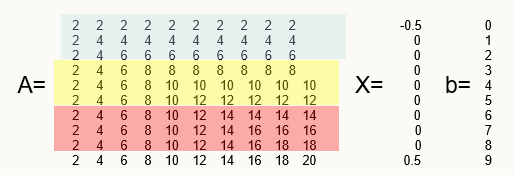

   You need to modify the above code and create a `function`  for `gaussElimination.m` with the function given by the following code

2. Sometimes you may not get accurate approximations using the above algorithm, e.g., what if
   $\mathbf{Aug}= \begin{bmatrix}
   0 & 5 & 3 & 2\\
   3 & 2 & -3 & 1\\
   1 & 2 & 1 & 7
   \end{bmatrix}$ then you cannot eliminate $R2$ using $R1$ as the scaling factor is $\dfrac{3}{0}$ which doesn't exist! Read the example https://web.mit.edu/10.001/Web/Course_Notes/GaussElimPivoting.html and write a function to solve the problem
   $\mathbf{A}= \begin{bmatrix}
   0 & 5 & 3 \\
   3 & 2 & -3\\
   1 & 2 & 1
   \end{bmatrix}, \mathbf{x}=\begin{bmatrix}
   x_1\\
   x_2\\
   x_3
   \end{bmatrix}, \mathbf{b}=\begin{bmatrix}
   2 \\
   1\\
   7
   \end{bmatrix}$
   
3. **Extra credit** Study lecture 26 https://www.math.hkust.edu.hk/~machas/numerical-methods-for-engineers.pdf, write a function to solve any linear system $Ax=b$ and output the $LU$ decomposition matrix.

In [16]:
function [listOfOutputs]=gaussElimination(listOfInputs)

%% you need to implement the gauss elimination algorithm by defining your inputs and outputs

%% your code goes here

end

In [18]:
function [listOfOutputs]=gaussEliminationPivot(listOfInputs)

%% you need to implement the gauss elimination algorithm by defining your inputs and outputs

%% your code goes here

end

In [19]:
clear
n=100;
A=zeros(n);
for i=1:n
    for j=1:n
        if j<i
            A(i,j)=2*(j);
        else
            A(i,j)=2*(i);
        end
    end
end

b = [0:1:n-1]';
[x]=gaussElimination(A,b) % gauss elimination

A2 =[0 5 3;
    3 2 -3;
    1 2 1]
[x]=gaussEliminationPivot(A,b) % gauss elimination with partial pivoting

error: 'listOfOutputs' undefined near line 1, column 1
error: called from
    gaussElimination at line 7 column 1
A2 =

   0   5   3
   3   2  -3
   1   2   1

error: 'listOfOutputs' undefined near line 1, column 1
error: called from
    gaussEliminationPivot at line 7 column 1
